In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = r"C:\Users\PC\Desktop\Nairobi City County\AQ_Stuff\csv files\NairobiAQAugust2024.csv"
df = pd.read_csv(file_path)
parse_dates = ['timestamp']

In [11]:
df

,timestamp,display_name,longitude,latitude,pm2_5
0,2024-08-31 23:00:00 UTC,Umoja 1,36.887630,-1.280720,10.0798
1,2024-08-31 23:00:00 UTC,Umoja 1,36.887630,-1.280720,10.0798
2,2024-08-31 23:00:00 UTC,Dandora Phase II,36.901220,-1.248590,17.8682
3,2024-08-31 23:00:00 UTC,Dandora Phase II,36.901220,-1.248590,17.8682
4,2024-08-31 23:00:00 UTC,Donholm,36.894560,-1.296480,12.3463
...,...,...,...,...,...
27309,2024-08-01 00:00:00 UTC,Parklands,36.819139,-1.268877,29.9395
27310,2024-08-01 00:00:00 UTC,Mukuru Kwa Reuben,36.869950,-1.315850,76.5730
27311,2024-08-01 00:00:00 UTC,Mukuru Kwa Reuben,36.869950,-1.315850,76.5730
27312,2024-08-01 00:00:00 UTC,Langata,36.741783,-1.338275,54.0207


In [12]:
df.describe()

,longitude,latitude,pm2_5
count,27314.000000,27314.000000,27314.000000
mean,36.854363,-1.281538,22.162485
std,0.083608,0.025974,13.616871
min,36.701270,-1.338275,4.376800
25%,36.812150,-1.298910,14.328400
50%,36.859570,-1.283724,17.914300
75%,36.894560,-1.265790,25.579700
max,37.088450,-1.235120,180.014000


In [13]:
print (df.shape)

(27314, 5)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27314 entries, 0 to 27313
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     27314 non-null  object 
 1   display_name  27314 non-null  object 
 2   longitude     27314 non-null  float64
 3   latitude      27314 non-null  float64
 4   pm2_5         27314 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.0+ MB


In [15]:
#converting time_stamp into date time
df ['timestamp'] = pd.to_datetime(df['timestamp'])

c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


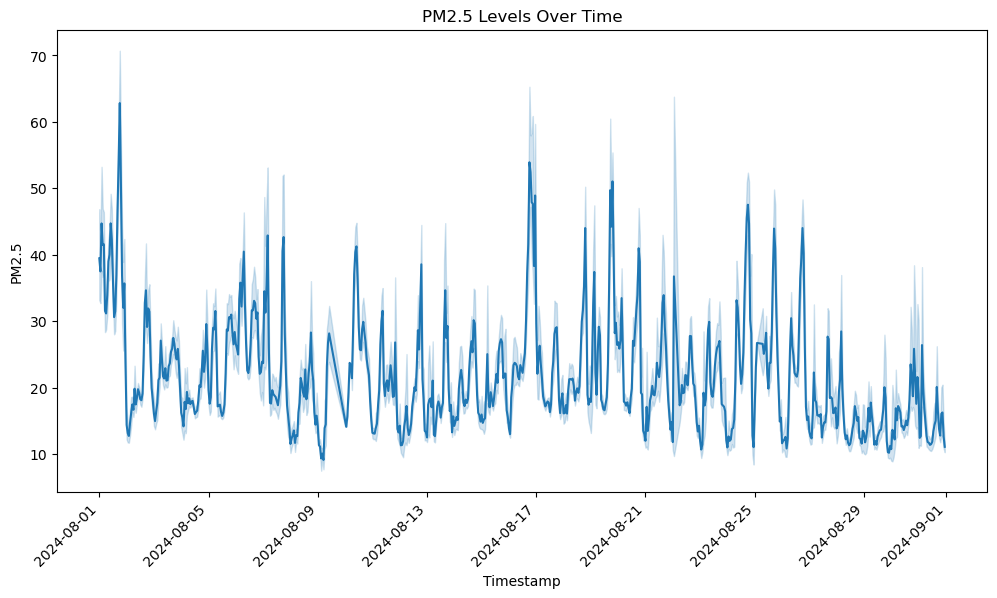

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='pm2_5', data=df)
plt.title('PM2.5 Levels Over Time')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5')

plt.xticks(rotation=45, ha='right')
plt.show()

### Showcasing missing hours per monitor

In [17]:
# Create a complete time range (hourly) for each monitor
all_timestamps = pd.date_range(start=df['timestamp'].min(), end=df['timestamp'].max(), freq='H')
monitors = df['display_name'].unique()

In [18]:
# Create a DataFrame for all timestamps and monitors
complete_data = pd.MultiIndex.from_product([all_timestamps, monitors], names=['timestamp', 'display_name'])
complete_df = pd.DataFrame(index=complete_data).reset_index()


In [19]:
# Merge with the original data
df = pd.merge(complete_df, df, on=['timestamp', 'display_name'], how='left')


In [20]:
# Add a column to indicate missing values
df['missing'] = df['pm2_5'].isna()

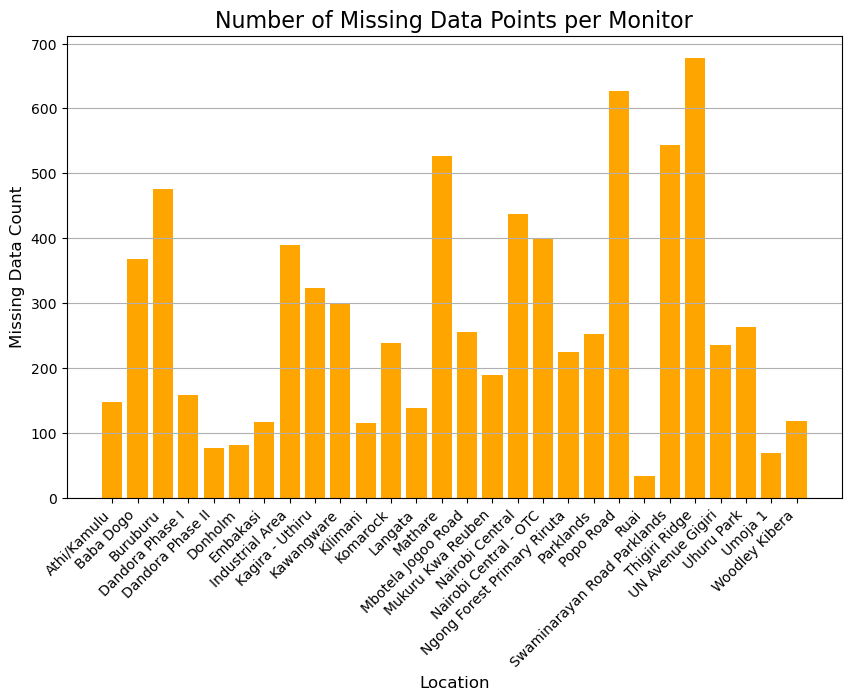

In [21]:
# Count missing values for each monitor
missing_counts = df.groupby('display_name')['missing'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(missing_counts['display_name'], missing_counts['missing'], color='orange')

# Add labels and title
plt.title("Number of Missing Data Points per Monitor", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Missing Data Count", fontsize=12)
plt.grid(axis='y')
plt.show()